In [503]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [504]:
# data = pd.read_csv("HistoricalPricesEuroInINR.csv")
data = pd.read_csv("historical_prices_euro_inr.csv")
data.head()

,Date,Open,Low,High,Close,Change
0,"Jan 09, 2024",91.0630,90.9520,91.0830,90.9330,0.18%
1,"Jan 08, 2024",90.9000,90.9965,91.1840,90.7890,0.16%
2,"Jan 07, 2024",90.7557,90.7557,90.7557,90.7557,-0.18%
3,"Jan 05, 2024",90.9230,91.1315,91.3850,90.4980,-0.19%
4,"Jan 04, 2024",91.0930,90.9655,91.3380,90.9125,0.16%


In [505]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1827 non-null   object 
 1   Open    1827 non-null   float64
 2   Low     1827 non-null   float64
 3   High    1827 non-null   float64
 4   Close   1827 non-null   float64
 5   Change  1827 non-null   object 
dtypes: float64(4), object(2)
memory usage: 85.8+ KB


In [506]:
data.describe()

,Open,Low,High,Close
count,1827.000000,1827.000000,1827.000000,1827.000000
mean,82.494797,82.505009,82.839959,82.205118
std,5.412309,5.422026,5.423504,5.412781
min,68.062000,68.107000,68.536000,67.965000
25%,78.780500,78.801000,79.131750,78.557000
50%,82.306000,82.304000,82.748500,81.942000
75%,87.527000,87.532750,87.924750,87.255750
max,92.446000,92.469000,92.665000,91.970500


In [507]:
col_names = data.columns
print(col_names)

Index(['Date', 'Open', 'Low', 'High', 'Close', 'Change'], dtype='object')


In [508]:
df = data.rename(columns=lambda x: x.replace(" ", "").lower())  # Replace spaces with underscores
df.columns

Index(['date', 'open', 'low', 'high', 'close', 'change'], dtype='object')

In [509]:
df

,date,open,low,high,close,change
0,"Jan 09, 2024",91.0630,90.9520,91.0830,90.9330,0.18%
1,"Jan 08, 2024",90.9000,90.9965,91.1840,90.7890,0.16%
2,"Jan 07, 2024",90.7557,90.7557,90.7557,90.7557,-0.18%
3,"Jan 05, 2024",90.9230,91.1315,91.3850,90.4980,-0.19%
4,"Jan 04, 2024",91.0930,90.9655,91.3380,90.9125,0.16%
...,...,...,...,...,...,...
1822,"Jan 16, 2017",72.2090,72.3870,72.5230,72.0740,-0.50%
1823,"Jan 13, 2017",72.5710,72.3420,72.7650,72.2550,0.35%
1824,"Jan 12, 2017",72.3145,72.2505,72.6865,72.1465,0.03%
1825,"Jan 11, 2017",72.2910,72.1640,72.4890,71.5820,0.24%


In [510]:
# Convert 'date' to datetime with explicit format and frequency
# df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y')

df.set_index('date', inplace=True)

In [511]:
if df.index.freq == None:
    df = df.fillna(method='ffill')  # Forward fill to fill missing values with the last available value

# Set the frequency to daily ('D')
df = df.asfreq('D')

# Check the frequency again
print(df.index.freq)  # This should print 'D'


<Day>


In [512]:
df.head()

,open,low,high,close,change
date,,,,,
2017-01-10,72.1195,72.0095,72.3575,72.0025,0.15%
2017-01-11,72.2910,72.1640,72.4890,71.5820,0.24%
2017-01-12,72.3145,72.2505,72.6865,72.1465,0.03%
2017-01-13,72.5710,72.3420,72.7650,72.2550,0.35%
2017-01-14,NaN,NaN,NaN,NaN,NaN


In [513]:
df.index

DatetimeIndex(['2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
               '2017-01-14', '2017-01-15', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19',
               ...
               '2023-12-31', '2024-01-01', '2024-01-02', '2024-01-03',
               '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07',
               '2024-01-08', '2024-01-09'],
              dtype='datetime64[ns]', name='date', length=2556, freq='D')

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2556 entries, 2017-01-10 to 2024-01-09
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1827 non-null   float64
 1   low     1827 non-null   float64
 2   high    1827 non-null   float64
 3   close   1827 non-null   float64
 4   change  1827 non-null   object 
dtypes: float64(4), object(1)
memory usage: 119.8+ KB


In [515]:
df.drop('change',axis=1, inplace=True)

In [516]:
df.head()

,open,low,high,close
date,,,,
2017-01-10,72.1195,72.0095,72.3575,72.0025
2017-01-11,72.2910,72.1640,72.4890,71.5820
2017-01-12,72.3145,72.2505,72.6865,72.1465
2017-01-13,72.5710,72.3420,72.7650,72.2550
2017-01-14,NaN,NaN,NaN,NaN


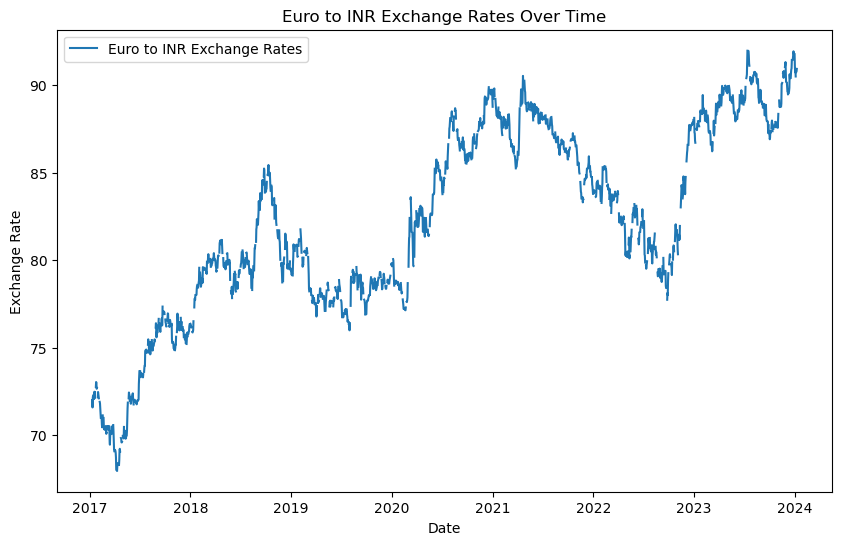

In [517]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Euro to INR Exchange Rates')
plt.title('Euro to INR Exchange Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

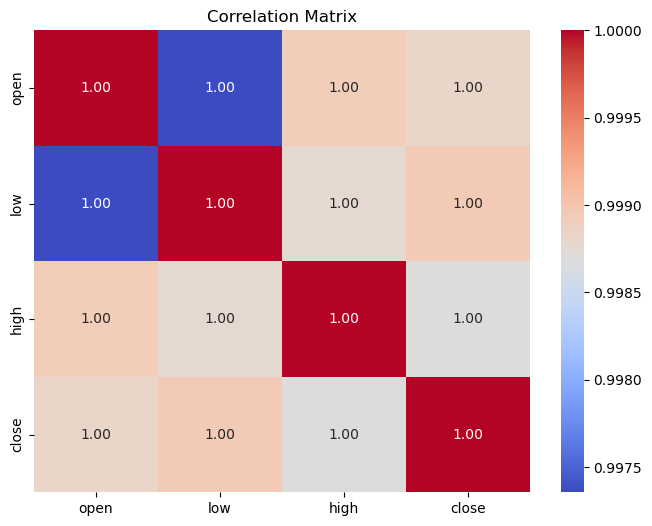

In [518]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [519]:
# Handling Missing Data
missing_data = data.isnull().sum()
print("\nMissing Data:")
print(missing_data)


Missing Data:
Date      0
Open      0
Low       0
High      0
Close     0
Change    0
dtype: int64


In [520]:
# Feature Engineering (Extracting Month and Year from Date)
df['month'] = df.index.month
df['year'] = df.index.year
df['day'] = df.index.day

In [521]:
df.head()

,open,low,high,close,month,year,day
date,,,,,,,
2017-01-10,72.1195,72.0095,72.3575,72.0025,1,2017,10
2017-01-11,72.2910,72.1640,72.4890,71.5820,1,2017,11
2017-01-12,72.3145,72.2505,72.6865,72.1465,1,2017,12
2017-01-13,72.5710,72.3420,72.7650,72.2550,1,2017,13
2017-01-14,NaN,NaN,NaN,NaN,1,2017,14


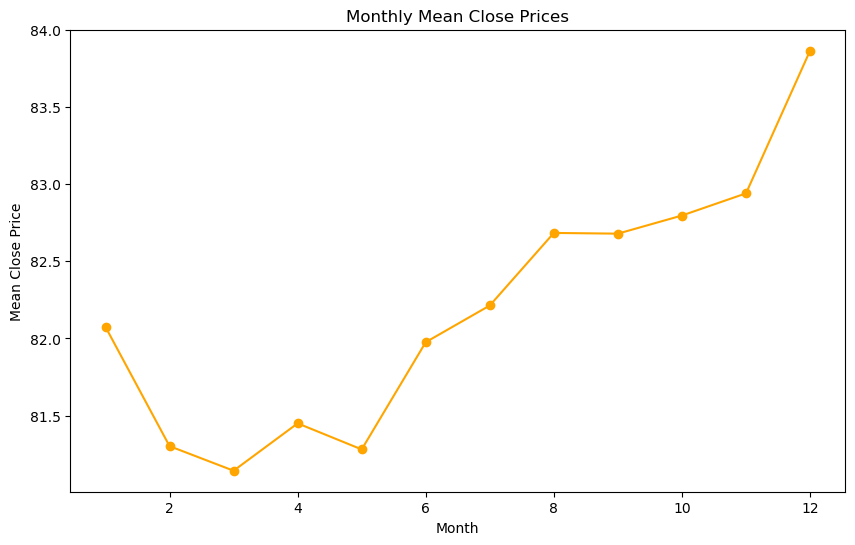

In [522]:
# Visualization of Monthly Mean Close Prices
monthly_mean = df.groupby('month')['close'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean.values, marker='o', linestyle='-', color='orange')
plt.title('Monthly Mean Close Prices')
plt.xlabel('Month')
plt.ylabel('Mean Close Price')
plt.show()

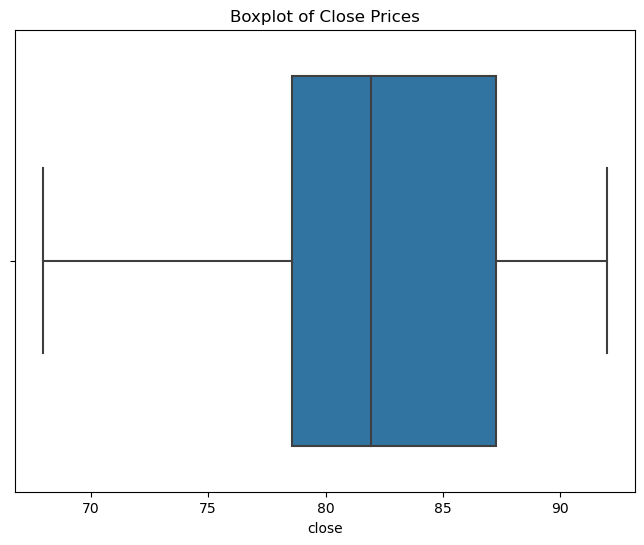

In [523]:
# Outlier Detection (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['close'])
plt.title('Boxplot of Close Prices')
plt.show()

In [524]:
# Data Split - Assuming last 10% of data as the test set
split_index = int(0.9 * len(df))
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2556 entries, 2017-01-10 to 2024-01-09
Freq: D
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1827 non-null   float64
 1   low     1827 non-null   float64
 2   high    1827 non-null   float64
 3   close   1827 non-null   float64
 4   month   2556 non-null   int32  
 5   year    2556 non-null   int32  
 6   day     2556 non-null   int32  
dtypes: float64(4), int32(3)
memory usage: 129.8 KB


In [526]:
df.index

DatetimeIndex(['2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
               '2017-01-14', '2017-01-15', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19',
               ...
               '2023-12-31', '2024-01-01', '2024-01-02', '2024-01-03',
               '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07',
               '2024-01-08', '2024-01-09'],
              dtype='datetime64[ns]', name='date', length=2556, freq='D')

In [527]:
# Fit ARIMA model on training data
model = ARIMA(train_data['close'], order=(1, 1, 1))
results = model.fit()
results

In [528]:
# Function to predict Euro to INR exchange rate for a future date
def predict_future_exchange_rate(model, data, steps=1):
    forecast = results.get_prediction(start=len(data), end=len(data) + steps - 1)
    forecast_ci = forecast.conf_int()
    return forecast.predicted_mean[-1], forecast_ci.iloc[-1, 0], forecast_ci.iloc[-1, 1]



In [538]:
# Example: Predict for the first date in the test set
future_date = test_data.index[0]
predicted_rate, lower_ci, upper_ci = predict_future_exchange_rate(model, data, steps=1)


In [539]:
# Display the predicted value and confidence interval for the future date
print(f'\nPredicted Euro to INR Exchange Rate for {future_date}: {predicted_rate:.2f} (CI: {lower_ci:.2f} - {upper_ci:.2f})')



Predicted Euro to INR Exchange Rate for 2023-04-29 00:00:00: 83.61 (CI: 83.03 - 84.19)
